In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
#print(df.head())
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df['director']

0       Kirsten Johnson
1                   NaN
2       Julien Leclercq
3                   NaN
4                   NaN
             ...       
8802      David Fincher
8803                NaN
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [8]:
df['director'].fillna('Unknown', inplace=True)
df['director']

0       Kirsten Johnson
1               Unknown
2       Julien Leclercq
3               Unknown
4               Unknown
             ...       
8802      David Fincher
8803            Unknown
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [9]:
df.dropna(subset=['date_added'], inplace= True)

In [10]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'])

In [11]:
df['year_added'] = df['date_added'].dt.year

In [12]:
df['month_added'] = df['date_added'].dt.month

In [13]:
text_cols = df.select_dtypes(include=['object']).columns
text_cols

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'rating',
       'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
df = df.apply(lambda col: col.str.lower() if col.dtype == 'object' else col)

In [15]:
print(df[['date_added', 'year_added', 'month_added']].head())

  date_added  year_added  month_added
0 2021-09-25        2021            9
1 2021-09-24        2021            9
2 2021-09-24        2021            9
3 2021-09-24        2021            9
4 2021-09-24        2021            9


In [18]:
ratings_with_minutes = df[df['rating'].str.contains(' min', na=False)]['rating'].unique()
if len(ratings_with_minutes) > 0:
    print(f"\nFound ratings that look like durations: {ratings_with_minutes}")
    # Strategy: If found, these are likely data entry errors. Given they are few,
    # we could replace them with the mode rating or 'Unknown'/NaN.
    # Let's find their indices and replace with mode.
    mode_rating = df['rating'].mode()[0]
    df['rating'] = df['rating'].apply(lambda x: mode_rating if isinstance(x, str) and ' min' in x else x)
    print(f"Replaced ratings containing ' min' with mode rating: {mode_rating}")
    print("\nUnique values in 'rating' column after cleaning:")
    print(df['rating'].unique())
else:
    print("\nNo ratings containing ' min' found. 'rating' column looks clean in this aspect.")


No ratings containing ' min' found. 'rating' column looks clean in this aspect.


In [19]:
print("\nUnique values in 'duration' (sample):")
print(df['duration'].unique()[:20])


Unique values in 'duration' (sample):
['90 min' '2 seasons' '1 season' '91 min' '125 min' '9 seasons' '104 min'
 '127 min' '4 seasons' '67 min' '94 min' '5 seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min']


In [20]:
print("\nDataFrame Info after type conversions and cleaning:")
df.info()


DataFrame Info after type conversions and cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          7972 non-null   object        
 5   country       7967 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8793 non-null   object        
 9   duration      8794 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
 12  year_added    8797 non-null   int32         
 13  month_added   8797 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1)


--- Step 4: Univariate Analysis ---

Analyzing Numerical Features:


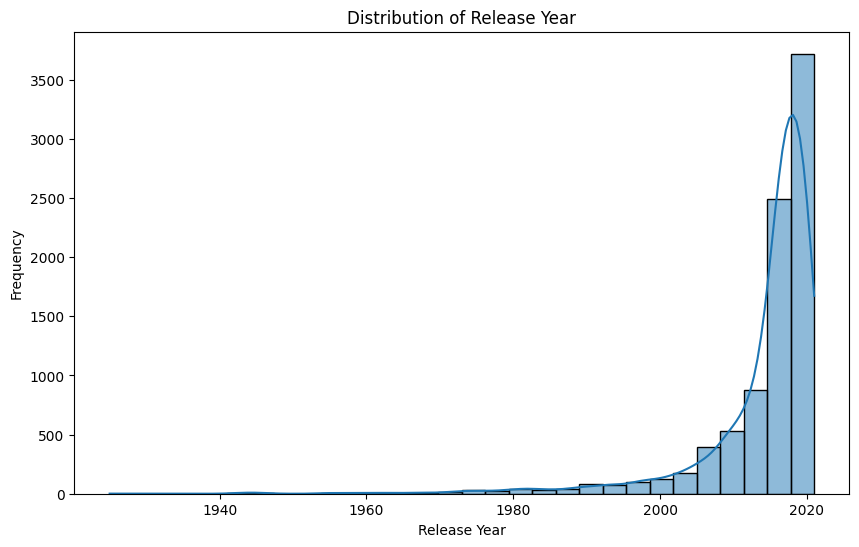

count    8797.000000
mean     2014.183472
std         8.822191
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64


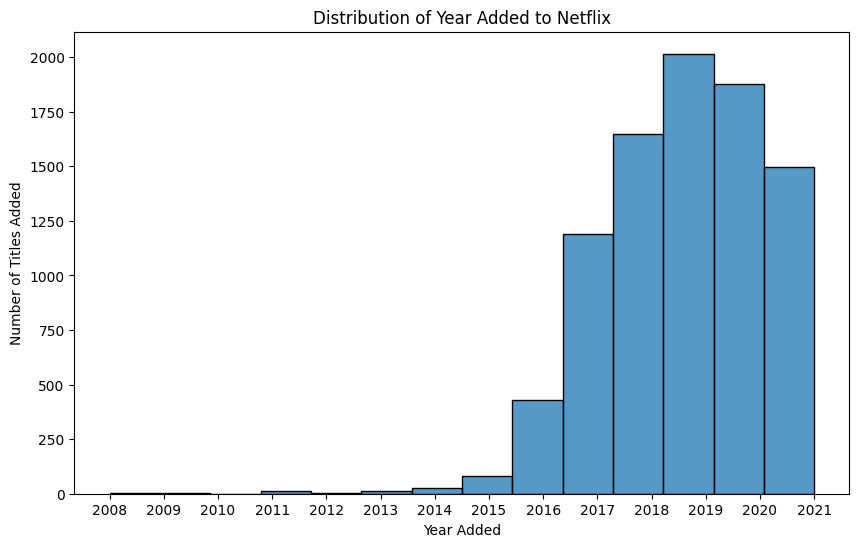

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64

Analyzing Categorical Features:


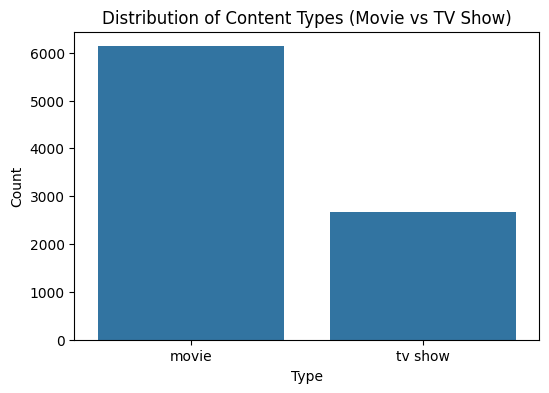

type
movie      69.694214
tv show    30.305786
Name: proportion, dtype: float64


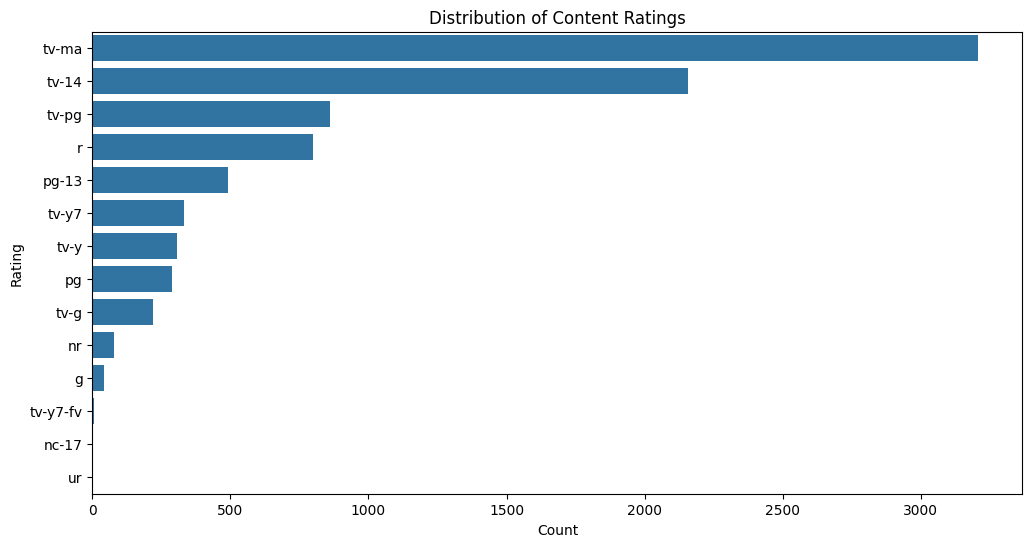

rating
tv-ma       3208
tv-14       2157
tv-pg        861
r            799
pg-13        490
tv-y7        333
tv-y         306
pg           287
tv-g         220
nr            79
g             41
tv-y7-fv       6
nc-17          3
ur             3
Name: count, dtype: int64


AttributeError: 'float' object has no attribute 'split'

In [21]:
# Step 4: Univariate Analysis

print("\n--- Step 4: Univariate Analysis ---")

# --- 4.1 Numerical Features ---
print("\nAnalyzing Numerical Features:")

# Release Year
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()
print(df['release_year'].describe())

# Year Added
plt.figure(figsize=(10, 6))
sns.histplot(df['year_added'], bins=len(df['year_added'].unique()), kde=False) # Use discrete bins
plt.title('Distribution of Year Added to Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.xticks(sorted(df['year_added'].unique().astype(int))) # Ensure x-ticks are clear years
plt.show()
print(df['year_added'].value_counts().sort_index())

# Month Added (Optional - distribution might be less informative)
# plt.figure(figsize=(10, 6))
# sns.histplot(df['month_added'], bins=12, kde=False)
# plt.title('Distribution of Month Added to Netflix')
# plt.xlabel('Month Added')
# plt.ylabel('Number of Titles Added')
# plt.xticks(range(1, 13))
# plt.show()

# --- 4.2 Categorical/Object Features ---
print("\nAnalyzing Categorical Features:")

# Type (Movie vs TV Show)
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index)
plt.title('Distribution of Content Types (Movie vs TV Show)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()
print(df['type'].value_counts(normalize=True) * 100) # Show percentage

# Rating
plt.figure(figsize=(12, 6))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index) # Use y for horizontal bars if many categories
plt.title('Distribution of Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()
print(df['rating'].value_counts())

# Country (Top N Countries - focusing on the first listed country for simplicity)
# Create a 'primary_country' column first
df['primary_country'] = df['country'].apply(lambda x: x.split(',')[0].strip() if x != 'Unknown' else 'Unknown')

plt.figure(figsize=(12, 8))
top_n = 15
country_order = df['primary_country'].value_counts().head(top_n).index
sns.countplot(y='primary_country', data=df[df['primary_country'].isin(country_order)], order=country_order)
plt.title(f'Distribution of Top {top_n} Primary Production Countries')
plt.xlabel('Count')
plt.ylabel('Primary Country')
plt.show()
print(f"\nTop {top_n} Primary Countries:")
print(df['primary_country'].value_counts().head(top_n))


# Listed In (Genres - requires splitting and counting)
# This is more complex as one title can have multiple genres.
# Let's count individual genres.
genres_raw = df['listed_in'].str.split(', ')
all_genres = [genre for sublist in genres_raw for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 10))
top_n_genres = 20
sns.barplot(y=genre_counts.head(top_n_genres).index, x=genre_counts.head(top_n_genres).values, orient='h')
plt.title(f'Top {top_n_genres} Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
print(f"\nTop {top_n_genres} Genres:")
print(genre_counts.head(top_n_genres))

# --- 4.3 Datetime Feature ---
print("\nAnalyzing Datetime Feature:")

# Trend of content added over the years (using year_added is simpler here)
content_added_yearly = df.groupby('year_added')['show_id'].count()
plt.figure(figsize=(10, 6))
content_added_yearly.plot(kind='line', marker='o')
plt.title('Trend of Content Added to Netflix Over Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()